# CNN for AED with Keras/TensorFlow

Date: December 11, 2018

Classification of acoustic events:

- Suzume
- Uguisu
- Hibari

## Preparing data set for CNN

In [30]:
DATASET_FOLDER = '../dataset/data_birds'

%run dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate()
shape = ds.get_shape()
class_labels = ds.get_class_labels()

### CNN model

In [31]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(4, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 94, 38, 4)         40        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 47, 19, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 17, 8)         296       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 22, 8, 8)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 20, 6, 16)         1168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 3, 16)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 480)               0         
__________

In [32]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

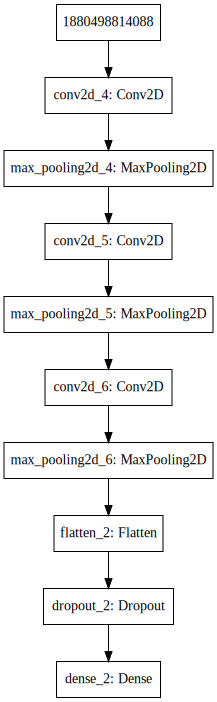

In [33]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [34]:
EPOCHS = 30
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 48 samples, validate on 24 samples
Epoch 1/30
48/48 [==============================] - 2s 44ms/step - loss: 1.2593 - acc: 0.2708 - val_loss: 1.0112 - val_acc: 0.6250
Epoch 2/30
48/48 [==============================] - 1s 28ms/step - loss: 1.0597 - acc: 0.3750 - val_loss: 0.9502 - val_acc: 0.6667
Epoch 3/30
48/48 [==============================] - 1s 24ms/step - loss: 0.9754 - acc: 0.5000 - val_loss: 0.8912 - val_acc: 0.7083
Epoch 4/30
48/48 [==============================] - 1s 31ms/step - loss: 0.9250 - acc: 0.6458 - val_loss: 0.8444 - val_acc: 0.8333
Epoch 5/30
48/48 [==============================] - 2s 37ms/step - loss: 0.8737 - acc: 0.6667 - val_loss: 0.7827 - val_acc: 0.8333
Epoch 6/30
48/48 [==============================] - 2s 44ms/step - loss: 0.8655 - acc: 0.6250 - val_loss: 0.7238 - val_acc: 0.8750
Epoch 7/30
48/48 [==============================] - 1s 23ms/step - loss: 0.7579 - acc: 0.7292 - val_loss: 0.6574 - val_acc: 0.7917
Epoch 8/30
48/48 [=====================

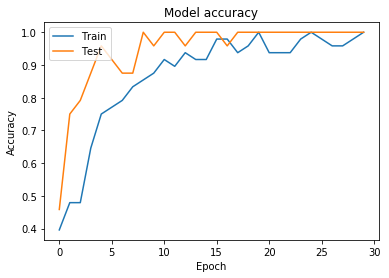

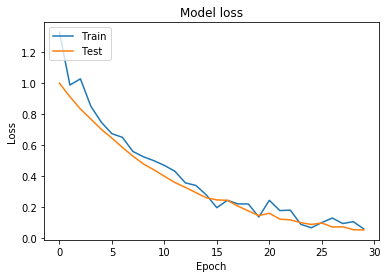

In [16]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [17]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_birds_{}.h5'.format(dt)
model.save(filename)

## Load the model

In [18]:
del model
model = models.load_model(filename)

## Confirmation

In [19]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(48, 96, 40, 1)

In [20]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [21]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [22]:
class_labels

['hibari', 'suzume', 'uguisu']

In [23]:
(activations[-1][:10]*100).astype(int)

array([[ 0,  0, 99],
       [ 0,  0, 99],
       [93,  6,  0],
       [ 1, 98,  0],
       [ 1, 98,  0],
       [ 1,  0, 98],
       [ 4, 95,  0],
       [94,  5,  0],
       [86, 13,  0],
       [ 0,  0, 99]])

In [24]:
test_labels[:10].astype(int)

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [25]:
def plot_layer(activations, sample, layer):
    a = activations[layer].shape
    rows = int(a[3]/4)
    fig, axarr = plt.subplots(rows, 4, figsize=[20,15])
    for i in range(a[3]):
        row = int(i/4)
        x, y = row, i-4*row
        axarr[x, y].imshow(np.rot90(activations[layer][sample, :, :, i]))
        axarr[x, y].set_xticks([])
        axarr[x, y].set_yticks([])

'hibari'

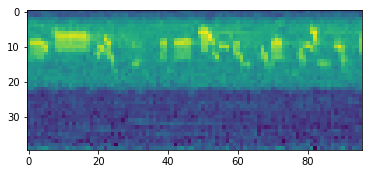

In [26]:
image_number = 10

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

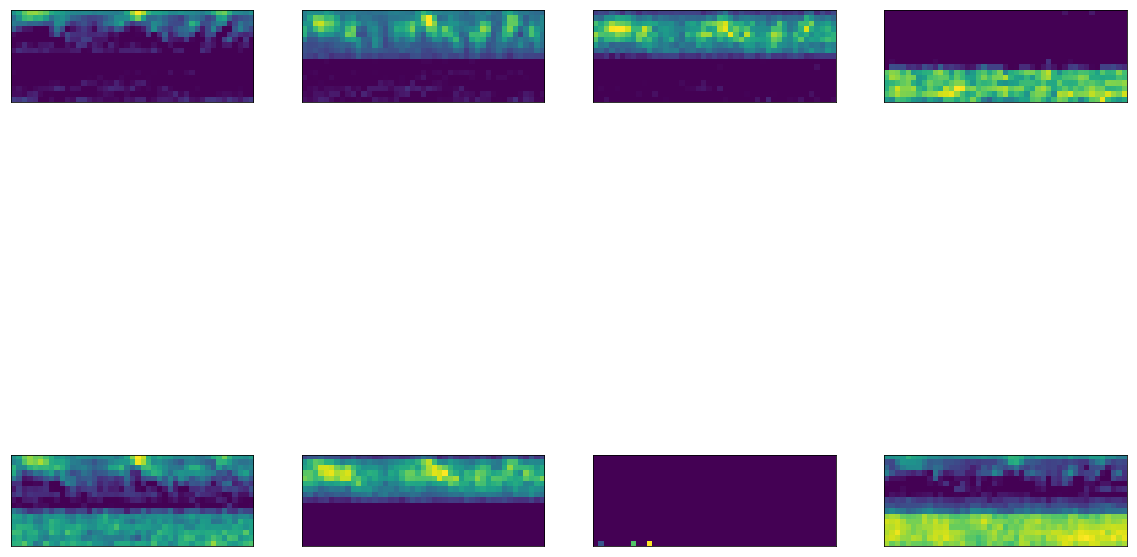

In [27]:
plot_layer(activations, image_number, 2)

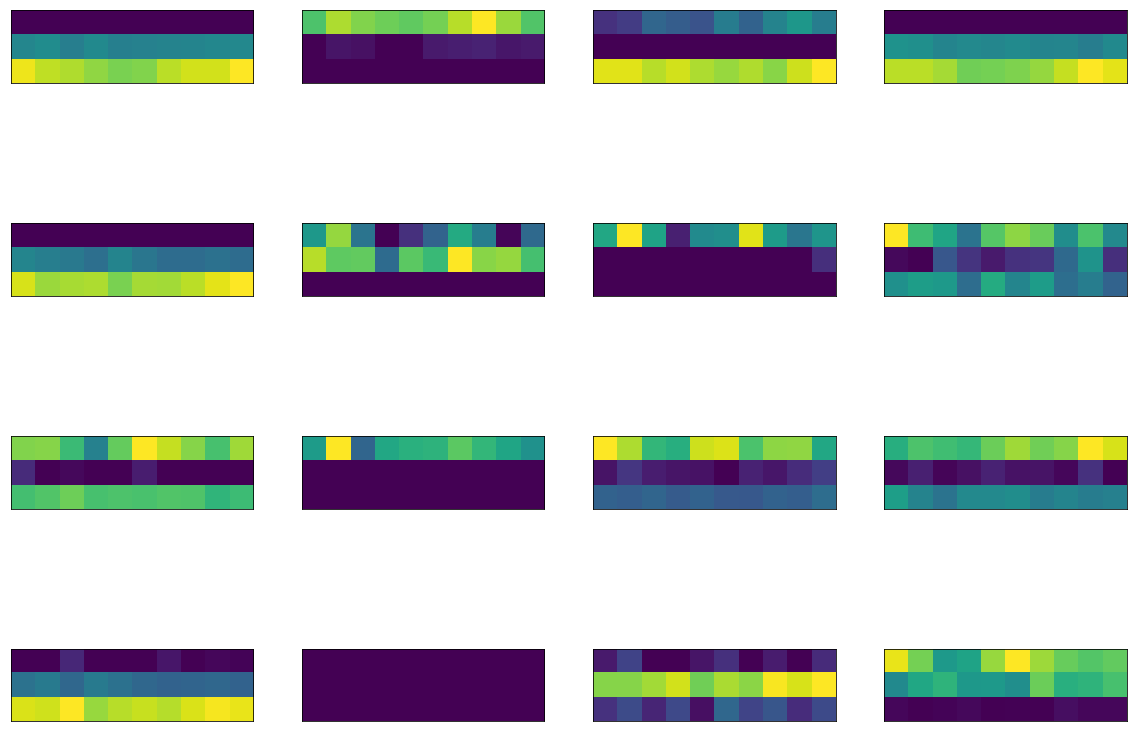

In [28]:
plot_layer(activations, image_number, 5)